#### Processing Data of Beat AML data wave 3/4
#### Data were downloaded from the paper for Beat AML data wave 3/4 (doi: 10.1016/j.ccell.2022.07.002)


In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../src/')
import matrix_convert as mc

# Loading BeatAML wave1/4 dataset

In [2]:
Data_dir = "~/Documents/Datasets/AML/BeatAML-wave1-4/Beat AML collaborator files Waves 1-4/"
# read from xlsx file
BeatAML_mut_w14 = pd.read_excel(Data_dir +"mutations/beataml_wes_wv1to4_mutations_v4.xlsx")
# read tsv file
BeatAML_drug_response_w14= pd.read_csv(Data_dir + "inhibitor/beataml_probit_curve_fits_v4_distr_nonproprietary.txt", sep = "\t")
print(np.median(BeatAML_drug_response_w14.loc[BeatAML_drug_response_w14['inhibitor'] == 'Venetoclax']['ic50']))
# The median value for Venetoclax IC50 is 0.87 uM for all the wave 1 /4 dataset.
BeatAML_rnaseq_w14 = pd.read_csv(Data_dir + "rnaseq/beataml_waves1to4_allnorm.txt", sep = "\t")

0.8708892960499856


# Select high frequently mutated genes 


In [3]:
BeatAML_mut_s = BeatAML_mut_w14.loc[:,['original_id','variant_classification',  'symbol','amino_acids','genotyper']]

#select variants from BeatAML_mut_s if the genotyper includes both mutect and varsan
BeatAML_mut_s['new_id'] = BeatAML_mut_s['symbol'] +':'+ BeatAML_mut_s['amino_acids']

print("The number of unique mutations in BeatAML_mut_s identified by either mutect or varscan: ")
print(len(BeatAML_mut_s['new_id'].unique()))
print("The number of unique mutations in BeatAML_mut_s identified by mutect: ")
print(len(BeatAML_mut_s.loc[BeatAML_mut_s['genotyper'] == 'mutect']['new_id'].unique()))
print("The number of unique mutations in BeatAML_mut_s identified by varscan: ")
print(len(BeatAML_mut_s.loc[BeatAML_mut_s['genotyper'] == 'varscan']['new_id'].unique()))
print("The number of unique mutations in BeatAML_mut_s identified by both mutect and varscan: ")
print(len(set(BeatAML_mut_s.loc[BeatAML_mut_s['genotyper'] == 'mutect']['new_id'].unique()).intersection(BeatAML_mut_s.loc[BeatAML_mut_s['genotyper'] == 'varscan']['new_id'].unique())))

The number of unique mutations in BeatAML_mut_s identified by either mutect or varscan: 
4909
The number of unique mutations in BeatAML_mut_s identified by mutect: 
3725
The number of unique mutations in BeatAML_mut_s identified by varscan: 
3981
The number of unique mutations in BeatAML_mut_s identified by both mutect and varscan: 
2797


In [4]:
# Convert gene mutation to a matrix
BeatAML_mut_matrix = mc.convert_df2matrix_bi(BeatAML_mut_s,"original_id","symbol")

# Select highly frequent mutated genes
selected_genes = []
for gene in BeatAML_mut_matrix.columns:
    if BeatAML_mut_matrix.loc[BeatAML_mut_matrix[gene] == 1].shape[0] >= 0.03*BeatAML_mut_matrix.shape[0]:
        selected_genes.append(gene)

selected_mutation_matrix = BeatAML_mut_matrix[selected_genes]
# Save the selected mutation matrix
#selected_mutation_matrix.to_csv("Feature_set1_mutation_matrix_w14.csv")

In [5]:
BeatAML_mut = BeatAML_mut_w14
w12 = set(BeatAML_mut.loc[BeatAML_mut['wave'] == "wave1+2"]['seq_id'])
w34 = set(BeatAML_mut.loc[BeatAML_mut['wave'] == "wave3+4"]['seq_id'])
print(len(w12))
print(len(w34))


603
268


In [6]:
BeatAML_mut_34 = BeatAML_mut.loc[BeatAML_mut['seq_id'].isin(w34)]
print(BeatAML_mut_34.shape)
BeatAML_mut_34.head(4)

(1946, 33)


,seqnames,pos_start,pos_end,ref,alt,genotyper,wave,seq_id,original_id,tumor_only,...,cdna_position,cds_position,protein_position,amino_acids,codons,existing_variation,refseq,sift,polyphen,exac_af
9775,6,44270562,44270562,C,T,mutect,wave3+4,30-00668,17-00328,0,...,2344/3854,2341/2958,781/985,V/I,Gtc/Atc,COSM3874428,NM_020745.3,tolerated(0.23),benign(0.01),NaN
9776,6,44270562,44270562,C,T,varscan,wave3+4,30-00668,17-00328,0,...,2344/3854,2341/2958,781/985,V/I,Gtc/Atc,COSM3874428,NM_020745.3,tolerated(0.23),benign(0.01),NaN
9777,17,30469470,30469482,CCCGCCGCCGCCG,C,varscan,wave3+4,20-00197,16-00458,1,...,362-373/1599,256-267/429,86-89/142,RRRR/-,CGGCGGCGGCGG/-,NaN,NaN,NaN,NaN,NaN
9778,15,89417081,89417081,G,A,mutect,wave3+4,40-00077,18-00290,0,...,7716/8840,7342/7593,2448/2530,G/R,Gga/Aga,rs202059945,NM_013227.3,tolerated(0.06),probably_damaging(0.965),0.000141


In [15]:
selected_mutation_matrix_34 = mc.convert_df2matrix_bi(BeatAML_mut_34,"original_id","symbol")

# Select highly frequent mutated genes
selected_genes = []
for gene in selected_mutation_matrix_34.columns:
    if selected_mutation_matrix_34.loc[selected_mutation_matrix_34[gene] == 1].shape[0] >= 0.03*selected_mutation_matrix_34.shape[0]:
        selected_genes.append(gene)

selected_mutation_matrix_34 = selected_mutation_matrix_34[selected_genes]
print(selected_mutation_matrix_34.shape)
# Save the selected mutation matrix


(268, 22)


(0.0, 30.0)

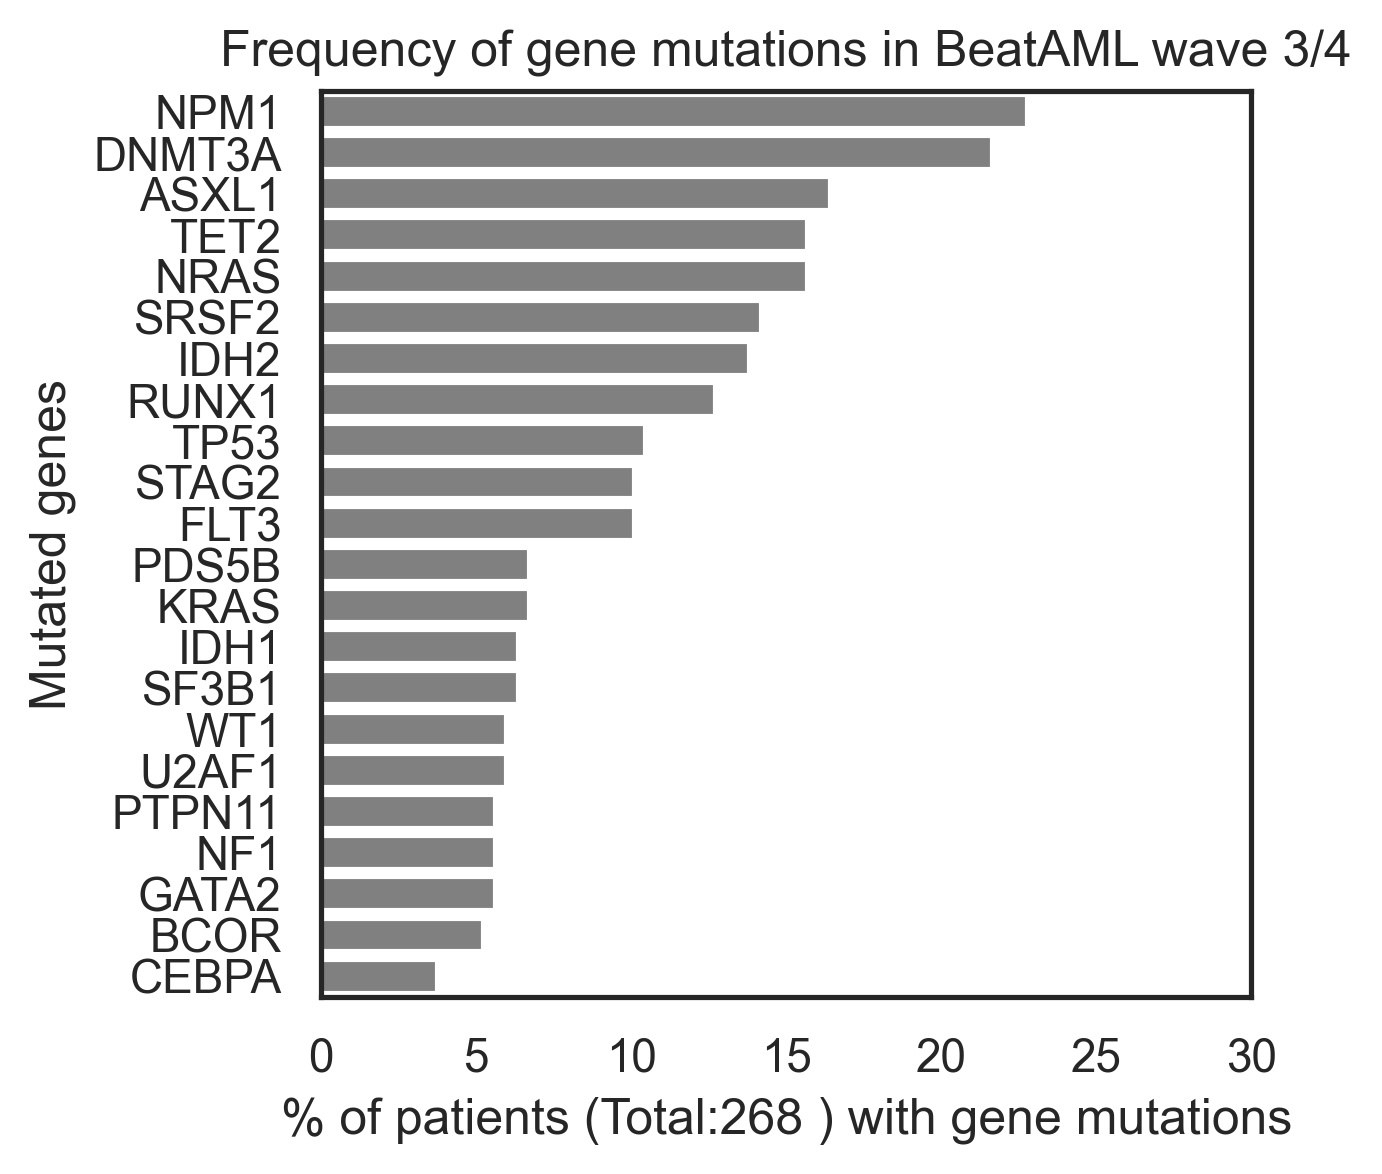

In [16]:
# Visualize the frequency of gene mutation
df_gene_mut_freq = selected_mutation_matrix_34.sum(axis = 0)/selected_mutation_matrix_34.shape[0] * 100
df_gene_mut_freq = df_gene_mut_freq.sort_values(ascending = False)
 
# convert the gene mutation frequency to a dataframe
df_gene_mut_freq = pd.DataFrame(df_gene_mut_freq, columns = ['Frequency'])
df_gene_mut_freq['Gene'] = df_gene_mut_freq.index

# bar plot for the frequency of gene mutation
import seaborn as sns
import matplotlib.pyplot as plt

# set background style
sns.set(style="white")
plt.figure(figsize=(4, 4), dpi=300)
sns.barplot(x = "Frequency", y = "Gene", 
            data = df_gene_mut_freq.sort_values(by = "Frequency", ascending = False),
            color="grey")
plt.xlabel("% of patients (Total:" + str(selected_mutation_matrix_34.shape[0])+ " ) with gene mutations")
plt.ylabel("Mutated genes")
plt.title("Frequency of gene mutations in BeatAML wave 3/4")

plt.xlim(0,30)


# Select variants or regions with high mutation frequency


In [21]:
BeatAML_mut.columns

Index(['seqnames', 'pos_start', 'pos_end', 'ref', 'alt', 'genotyper', 'wave',
       'seq_id', 'original_id', 'tumor_only', 'total_reads', 'allele_reads',
       'normal_total_reads', 'normal_allele_reads', 't_vaf', 'n_vaf',
       'variant_classification', 'hgvsp_short', 'gene', 'symbol', 'biotype',
       'hgvsc', 'hgvsp', 'cdna_position', 'cds_position', 'protein_position',
       'amino_acids', 'codons', 'existing_variation', 'refseq', 'sift',
       'polyphen', 'exac_af'],
      dtype='object')

In [17]:

BeatAML_mut['new_id'] = BeatAML_mut['symbol'] +':'+ BeatAML_mut['hgvsp_short'] + ':' + BeatAML_mut['pos_start'].astype(str)
BeatAML_mut['new_id_patient'] = BeatAML_mut['seq_id'] + ':'+ BeatAML_mut['symbol'] +':'+ BeatAML_mut['hgvsp_short']
BeatAML_mut.shape

(11721, 35)

In [23]:
BeatAML_mut.columns

Index(['seqnames', 'pos_start', 'pos_end', 'ref', 'alt', 'genotyper', 'wave',
       'seq_id', 'original_id', 'tumor_only', 'total_reads', 'allele_reads',
       'normal_total_reads', 'normal_allele_reads', 't_vaf', 'n_vaf',
       'variant_classification', 'hgvsp_short', 'gene', 'symbol', 'biotype',
       'hgvsc', 'hgvsp', 'cdna_position', 'cds_position', 'protein_position',
       'amino_acids', 'codons', 'existing_variation', 'refseq', 'sift',
       'polyphen', 'exac_af', 'new_id', 'new_id_patient'],
      dtype='object')

In [18]:
all_ids = set()
remain_index = set()

for i in range(0, BeatAML_mut.shape[0]):
    newid = BeatAML_mut.iloc[i,34]

    genotyper = BeatAML_mut.iloc[i,5]
    if genotyper == "mutect":
        if newid not in all_ids:
            remain_index.add(i)
        all_ids.add(newid)
print(len(remain_index))
for i in range(0, BeatAML_mut.shape[0]):
    newid = BeatAML_mut.iloc[i,34]

    genotyper = BeatAML_mut.iloc[i,5]
    if genotyper == "varscan":
        if newid in all_ids:
            all_ids.add(newid)
        else:
            remain_index.add(i)
            all_ids.add(newid)

print(len(remain_index))

BeatAML_mut_unique_vaf = BeatAML_mut.iloc[list(remain_index),]


5498
7607


In [20]:
#BeatAML_mut_unique_vaf_w34 = BeatAML_mut_unique_vaf.loc[BeatAML_mut_unique_vaf['wave'] == "wave3+4"]

In [19]:
# Select highly frequently mutated variants
BeatAML_mut_matrix_vaf = mc.convert_df2matrix_cont(BeatAML_mut_unique_vaf,'new_id','seq_id','t_vaf')
BeatAML_mut_matrix_vaf = BeatAML_mut_matrix_vaf.transpose()


In [20]:
# Select highly frequent mutated variants
selected_variants = []
for gene in BeatAML_mut_matrix_vaf.columns:
    if BeatAML_mut_matrix_vaf.loc[BeatAML_mut_matrix_vaf[gene] > 0].shape[0] > 0.01*BeatAML_mut_matrix_vaf.shape[0]:
        selected_variants.append(gene)

BeatAML_mut_matrix_vaf_sele = BeatAML_mut_matrix_vaf[selected_variants]
BeatAML_mut_matrix_vaf_sele.columns

Index(['PDS5B:p.V1024F:33332238', 'FLT3:p.D835Y:28592642',
       'NPM1:p.W288Cfs*12:170837543', 'SRSF2:p.P95H:74732959',
       'DNMT3A:p.R882H:25457242', 'ASXL1:p.G646Wfs*12:31022441',
       'NRAS:p.G12D:115258747', 'IDH1:p.R132H:209113112',
       'DNMT3A:p.R882C:25457243', 'ZNF687:p.R939Pfs*36:151262327',
       'SF3B1:p.K700E:198266834', 'IDH2:p.R140Q:90631934',
       'KRAS:p.G12D:25398284', 'IDH2:p.R172K:90631838',
       'FLT3:p.I836del:28592634', 'JAK2:p.V617F:5073770',
       'SRSF2:p.P95R:74732959', 'FLT3:p.D835H:28592642',
       'IDH1:p.R132C:209113113', 'NRAS:p.Q61H:115256528',
       'NRAS:p.G13D:115258744', 'SRSF2:p.P95L:74732959',
       'SF3B1:p.K666N:198267359', 'U2AF1:p.S34F:44524456',
       'NF1:p.I679Dfs*21:29553477', 'NPM1:p.W288Cfs*12:170837544',
       'NRAS:p.Q61K:115256530', 'KIT:p.D816V:55599321',
       'ASXL1:p.G645Vfs*58:31022441', 'KRAS:p.G13D:25398281',
       'NPM1:p.W288Cfs*12:170837545', 'SRSF2:p.P95_R102del:74732935',
       'U2AF1:p.Q157P:4451477

In [29]:
set(sorted(BeatAML_mut.loc[BeatAML_mut['symbol']=="FLT3"]['new_id']))

{'FLT3:p.A680V:28602329',
 'FLT3:p.D835E:28592640',
 'FLT3:p.D835H:28592642',
 'FLT3:p.D835N:28592642',
 'FLT3:p.D835V:28592641',
 'FLT3:p.D835Y:28592642',
 'FLT3:p.D839G:28592629',
 'FLT3:p.F594I:28608276',
 'FLT3:p.I836del:28592634',
 'FLT3:p.L442_A443dup:28610161',
 'FLT3:p.M659V:28602393',
 'FLT3:p.N676K:28602340',
 'FLT3:p.N676T:28602341',
 'FLT3:p.N841I:28592623',
 'FLT3:p.N841K:28592622',
 'FLT3:p.N841T:28592623',
 'FLT3:p.S451F:28610138',
 'FLT3:p.V491L:28609758',
 'FLT3:p.V592D:28608281',
 'FLT3:p.V592G:28608281',
 'FLT3:p.Y572C:28608341',
 'FLT3:p.Y842C:28592620'}

In [27]:
selected_variants = {
    "DNMT3A:p.R882":['DNMT3A:p.R882H:25457242','DNMT3A:p.R882C:25457243'],
    "ASXL1:p.G645-646":["ASXL1:p.G645Vfs*58:31022441",
                        'ASXL1:p.G646Wfs*12:31022441', 
                        'ASXL1:p.G645Wfs*12:31022441',],
    "FLT3:p.835-839":['FLT3:p.D835E:28592640',
                      'FLT3:p.D835H:28592642',
                      'FLT3:p.D835N:28592642',
                      'FLT3:p.D835V:28592641',
                      'FLT3:p.D835Y:28592642',
                      'FLT3:p.D839G:28592629',
                      'FLT3:p.I836del:28592634'],
                                          
     "IDH1:p.R132":['IDH1:p.R132C:209113113',
                        'IDH1:p.R132G:209113113',
                        'IDH1:p.R132H:209113112',
                        'IDH1:p.R132L:209113112',
                        'IDH1:p.R132S:209113113'],
    "IDH2:p.R140":['IDH2:p.R140L:90631934',
                    'IDH2:p.R140Q:90631934',
                    'IDH2:p.R140W:90631935'],

    "IDH2:p.R172":["IDH2:p.R172K:90631838"],

    "JAK2:p.V617":["JAK2:p.V617F:5073770"],
    "KIT:p.D816":[ 'KIT:p.D816H:55599320',
                    'KIT:p.D816V:55599321',
                    'KIT:p.D816Y:55599320'],
    "KRAS:p.G12/13":['KRAS:p.G12A:25398284',
                        'KRAS:p.G12C:25398285',
                        'KRAS:p.G12D:25398284',
                        'KRAS:p.G12R:25398285',
                        'KRAS:p.G12V:25398284',
                        'KRAS:p.G13D:25398281',
                        'KRAS:p.G13R:25398282'],
   # "NF1:p.I679Dfs*21:29553477":["NF1:p.I679Dfs*21:29553477"],
    "NPM1:p.W288-90":['NPM1:p.W288Cfs*12:170837543',
                    'NPM1:p.W288Cfs*12:170837544',
                    'NPM1:p.W288Cfs*12:170837545',
                    'NPM1:p.W288Cfs*12:170837546',
                    'NPM1:p.W288Cfs*12:170837547',
                    'NPM1:p.W290Cfs*10:170837553',
                    'NPM1:p.W290Rfs*10:170837551'],
    "NRAS:p.G12/13":['NRAS:p.G12A:115258747',
                    'NRAS:p.G12C:115258748',
                    'NRAS:p.G12D:115258747',
                    'NRAS:p.G12R:115258748',
                    'NRAS:p.G12S:115258748',
                    'NRAS:p.G13C:115258745',
                    'NRAS:p.G13D:115258744',
                    'NRAS:p.G13R:115258745',
                    'NRAS:p.G13V:115258744',],
    "NRAS:p.Q61":['NRAS:p.Q61H:115256528',
                    'NRAS:p.Q61K:115256530',
                    'NRAS:p.Q61L:115256529',
                    'NRAS:p.Q61P:115256529',
                    'NRAS:p.Q61R:115256529'],
    "SF3B1:p.K700E":["SF3B1:p.K700E:198266834"],
    "SF3B1:p.K666":['SF3B1:p.K666E:198267361',
                    'SF3B1:p.K666M:198267360',
                    'SF3B1:p.K666N:198267359',
                    'SF3B1:p.K666Q:198267361',
                    'SF3B1:p.K666T:198267360'],
    "SRSF2:p.94-95":['SRSF2:p.P95H:74732959',
                        'SRSF2:p.P95L:74732959',
                        'SRSF2:p.P95R:74732959',
                        'SRSF2:p.P95_R102del:74732935',
                        'SRSF2:p.P95delinsRA:74732959',
                        'SRSF2:p.R94dup:74732959'],
    "U2AF1:p.S34":['U2AF1:p.S34F:44524456',
                    'U2AF1:p.S34Y:44524456'],
    "U2AF1:p.156-157":['U2AF1:p.Q157P:44514777',
                        'U2AF1:p.Q157R:44514777',
                        'U2AF1:p.R156H:44514780',],
    "ZNF687:p.R939Pfs*36:151262327":["ZNF687:p.R939Pfs*36:151262327"],
    }


In [28]:
selected_variants.keys()

dict_keys(['DNMT3A:p.R882', 'ASXL1:p.G645-646', 'FLT3:p.835-839', 'IDH1:p.R132', 'IDH2:p.R140', 'IDH2:p.R172', 'JAK2:p.V617', 'KIT:p.D816', 'KRAS:p.G12/13', 'NPM1:p.W288-90', 'NRAS:p.G12/13', 'NRAS:p.Q61', 'SF3B1:p.K700E', 'SF3B1:p.K666', 'SRSF2:p.94-95', 'U2AF1:p.S34', 'U2AF1:p.156-157', 'ZNF687:p.R939Pfs*36:151262327'])

In [29]:
df_select_variants = pd.DataFrame()
for i in selected_variants:
    df_select_variants[i] = BeatAML_mut_matrix_vaf[selected_variants[i]].sum(axis = 1)


In [30]:
print(df_select_variants.shape)
df_select_variants.sum(axis = 0)

(871, 18)


DNMT3A:p.R882                    46.255315
ASXL1:p.G645-646                 13.977639
FLT3:p.835-839                   16.801544
IDH1:p.R132                      27.756067
IDH2:p.R140                      35.646288
IDH2:p.R172                       7.297286
JAK2:p.V617                      14.494582
KIT:p.D816                        5.313565
KRAS:p.G12/13                     9.329363
NPM1:p.W288-90                   58.161133
NRAS:p.G12/13                    25.327417
NRAS:p.Q61                       14.738141
SF3B1:p.K700E                     5.252117
SF3B1:p.K666                     11.228673
SRSF2:p.94-95                    44.377010
U2AF1:p.S34                      10.945917
U2AF1:p.156-157                   5.575217
ZNF687:p.R939Pfs*36:151262327     2.459915
dtype: float64

In [31]:
df_select_variants.sum()

# remove the variants with zero frequency
df_select_variants1 = df_select_variants.loc[:,df_select_variants.sum(axis = 0) > 0]
df_select_variants1

,DNMT3A:p.R882,ASXL1:p.G645-646,FLT3:p.835-839,IDH1:p.R132,IDH2:p.R140,IDH2:p.R172,JAK2:p.V617,KIT:p.D816,KRAS:p.G12/13,NPM1:p.W288-90,NRAS:p.G12/13,NRAS:p.Q61,SF3B1:p.K700E,SF3B1:p.K666,SRSF2:p.94-95,U2AF1:p.S34,U2AF1:p.156-157,ZNF687:p.R939Pfs*36:151262327
11-00178,0.0,0.0,0.00000,0.0,0.369748,0.0,0.0,0.000000,0.0,0.298701,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
30-00676,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
20-00100,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
15-00626,0.0,0.0,0.00000,0.0,0.429864,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
20-00544,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.482213,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16-00046,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
20-00258,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.489362,0.0,0.0,0.000000
14-00573,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.142857
14-00514,0.0,0.0,0.42963,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [32]:
df_select_variants1.to_csv("../Data/Feature_set2_variants_matrix_w1_4.csv")

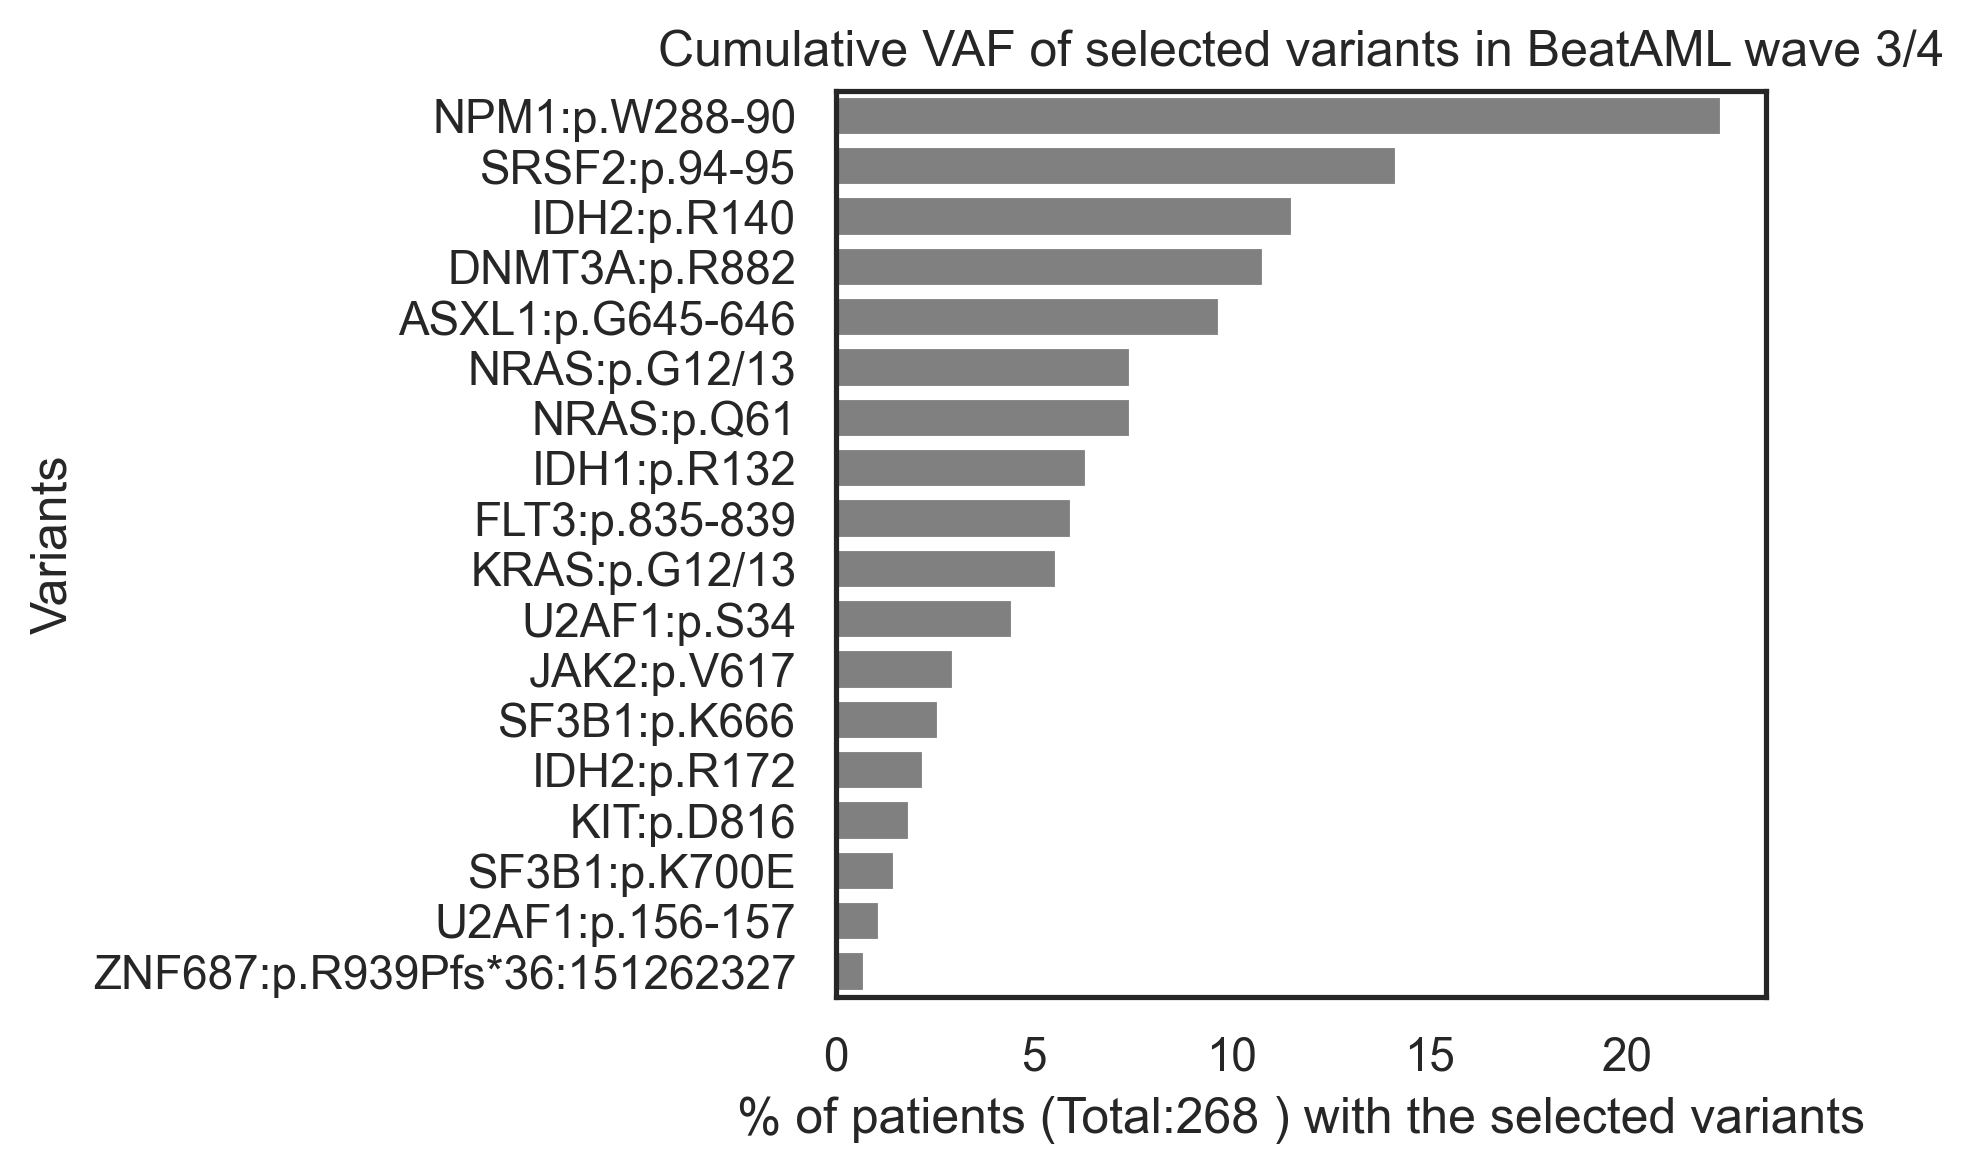

In [33]:
df_select_variants_w34 = df_select_variants.loc[list(w34),]

variants = pd.DataFrame()
Genes = []
variants = []
freq = []
for i in selected_variants:
    variants.append(i)
    Genes.append(i.split(":")[0])
    freq.append(df_select_variants_w34.loc[df_select_variants_w34[i] > 0].shape[0]/df_select_variants_w34.shape[0]*100)

variants = pd.DataFrame({"Gene":Genes,"variants":variants,"freq":freq})
variants

# barplot of the frequency of the selected variants ordered by the frequency
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4), dpi=300)
sns.barplot(x = "freq", y = "variants", 
            data = variants.sort_values(by = "freq", ascending = False),
            color="grey")
plt.xlabel("% of patients (Total:" + str(df_select_variants_w34.shape[0])+ " ) with the selected variants")
plt.ylabel("Variants")
plt.title("Cumulative VAF of selected variants in BeatAML wave 3/4")
plt.show()

In [39]:
# outer join  df_select_variants and selected_mutation_matrix
print(df_select_variants1.shape)
print(selected_mutation_matrix.shape)
selected_merged_matrix = selected_mutation_matrix.join(df_select_variants1)
selected_merged_matrix = selected_merged_matrix.fillna(0)

#selected_merged_matrix = pd.concat([ selected_mutation_matrix, df_select_variants], axis = 1, join = "outer")
print(selected_merged_matrix.shape)


(871, 18)
(871, 23)
(871, 41)


In [47]:
selected_merged_matrix.to_csv("../data/Feature_set12_merged_matrix_w1_4.csv")

## RNASeq data processing


In [49]:
BeatAML_rnaseq_w14["RNAseq_geneSymbol"] =BeatAML_rnaseq_w14['stable_id']

In [50]:
BeatAML_rnaseq_matrix = BeatAML_rnaseq_w14.iloc[0:,4:-1]
BeatAML_rnaseq_matrix.index = list(BeatAML_rnaseq_w14.iloc[0:,-1])

print(BeatAML_rnaseq_matrix.shape)

(23150, 707)


In [51]:
# For the RNASeq data, we updated to the features to the genes with expression value (log(RPKM)) greater than 0 in at least 50% 
remain_indexs = []
for index in range(0,BeatAML_rnaseq_matrix.shape[0] ):
    cur_values = BeatAML_rnaseq_matrix.iloc[index,:].values
    if len(cur_values[cur_values>0]) >= BeatAML_rnaseq_matrix.shape[1]/2:
        remain_indexs.append(index)

In [53]:
BeatAML_rnaseq_matrix.iloc[remain_indexs,:].transpose().to_csv("../Data/Feature_set3_RNAseq_matrix_w1_4.csv")

In [55]:
print(selected_merged_matrix.shape)
print(BeatAML_rnaseq_matrix.iloc[remain_indexs,:].transpose().shape)

(871, 41)
(707, 19853)


In [57]:
print(selected_merged_matrix.shape)
feature_matrix = pd.concat([selected_merged_matrix, BeatAML_rnaseq_matrix.iloc[remain_indexs,:].transpose()], axis = 1,join="outer")
print(feature_matrix.shape)
print(feature_matrix.dropna().shape)
feature_matrix.dropna().head(4)

(871, 41)
(963, 19894)
(615, 19894)


,FLT3,SRSF2,CEBPA,SF3B1,NPM1,KRAS,RUNX1,DNMT3A,ASXL1,IDH2,...,ENSG00000273448,ENSG00000273449,ENSG00000273456,ENSG00000273464,ENSG00000273466,ENSG00000273472,ENSG00000273477,ENSG00000273483,ENSG00000273486,ENSG00000273488
17-00066,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,4.897580,4.249767,3.154424,2.291862,4.806115,0.176677,4.278755,1.890849,6.255404,3.794272
18-00208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.086840,3.863839,4.380531,-2.240396,4.096660,1.693240,0.882506,1.370620,3.378081,2.421560
15-00626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.030779,3.944372,3.434099,-0.887309,4.482620,0.208953,0.593270,-1.964606,4.191170,3.655840
14-00127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.920347,4.141740,3.058391,1.521636,4.882847,-0.494522,0.464918,1.559214,4.320277,2.942359


In [58]:
#feature_matrix_noNA = feature_matrix.dropna()
feature_matrix.to_csv("../Data/Feature_set123_merged_matrix_w1_4.csv")

In [59]:
# Ready to use features

## 1. Feature set 1:
print(selected_mutation_matrix.shape)

## 2. Feature set 2:
print(df_select_variants1.shape)

## 3. Feature set 1 and 2: 
print(selected_merged_matrix.shape)

## 4. Feature set 1, 2, and 3
print(feature_matrix.shape)

#selected_mutation_matrix.to_csv("../Data/Feature_set1_mutation_matrix_w12.csv")
#df_select_variants.to_csv("../Data/Feature_set2_variants_matrix_w12.csv")
#selected_merged_matrix.to_csv( "../Data/Feature_set12_merged_matrix_w12.csv")
#feature_matrix.to_csv("../Data/Feature_set123_merged_matrix_w12.csv")


(871, 23)
(871, 18)
(871, 41)
(963, 19894)


# Generate feature and label matrix for IC50

In [60]:
#BeatAML_drug_response_ic50_matrix = convert_df2matrix_cont(BeatAML_drug_response, 'lab_id', 'inhibitor', 'ic50') 
BeatAML_drug_response_ic50_matrix = mc.convert_df2matrix_cont(BeatAML_drug_response_w14, 'lab_id', 'inhibitor', 'ic50') 
beatAML_data_feature_ic50 = pd.concat([feature_matrix,BeatAML_drug_response_ic50_matrix], axis = 1,join = "outer")
beatAML_data_feature_ic50.to_csv("../data/beatAML_wave14_feature_ic50_highExpr_Mar19_2024_w1_4.csv")

# Generate feature and label matrix for AUC

In [61]:
BeatAML_drug_response_auc_matrix = mc.convert_df2matrix_cont(BeatAML_drug_response_w14, 'lab_id', 'inhibitor', 'auc') 
beatAML_data_feature_auc = pd.concat([feature_matrix,BeatAML_drug_response_auc_matrix], axis = 1, join="outer")
beatAML_data_feature_auc.to_csv("../data/beatAML_wave14_feature_auc_highExpr_Mar19_2024_w1_4.csv")